# Data @ Rice Workshop: Machine Learning / TensorFlow Interactive Notebook

#### Corrin Fosmire
#### November 14, 2019

## About

This Jupyter notebook is going to be used to show examples of machine learning, beginning with simpler methods and extending to more complex ones.
 
## Objectives

Concretely, this workshop will teach you background on and basics of the following:

* Machine Learning problems
* Linear Regression and Logistic Regression
* Neural Network Models
* Reinforcement Learning
 
This workshop is based on a series of labs created by Devika Subramanian for her COMP340 course at Rice University during the Fall 2018 term.

                                                                                                                       
## Linear Regression 

### Importing data and visualizing

Text(0, 0.5, 'Median home value in $10000s')

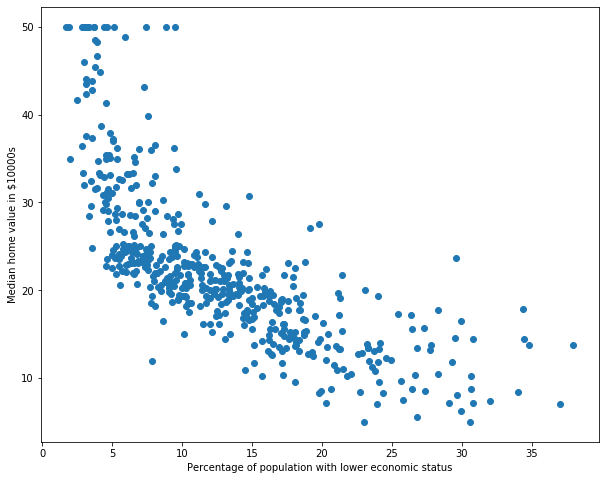

In [1]:
from sklearn import linear_model
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,8

bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)

#  X is the percentage of the population in a census tract that is of
#  lower economic status. X is a vector of length 506.
#  y is to the median home value in $10000's. y is a vector of length 506

X = df.LSTAT
XX = np.vstack([np.ones((X.shape[0],)),X]).T
y = bdata.target

plt.scatter(X,y)
plt.xlabel('Percentage of population with lower economic status')
plt.ylabel('Median home value in $10000s')

###  Running sklearn's linear regression model

The coefficients computed by sklearn:  34.55384087938311  and  -0.9500493537579912


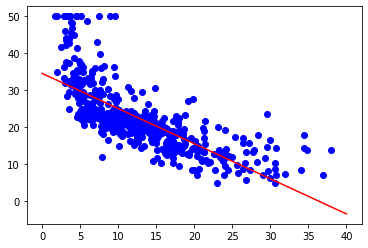

In [2]:
lr = linear_model.LinearRegression()
lr.fit(XX,y)

print("The coefficients computed by sklearn: ", lr.intercept_, " and ", lr.coef_[1])
modelx = np.linspace(0, 40, 80) # evenly spaced points every half-inch
plt.plot(X, y, 'bo', modelx, lr.intercept_ + modelx * lr.coef_[1], 'r-')

## Logistic Regression 

### Making a simple classification model and checking its accuracy

In [3]:
from sklearn.metrics import confusion_matrix

logreg = linear_model.LogisticRegression(solver='lbfgs')
caty = 1 * (y > 20)
Xp = np.array(X).reshape(-1, 1) # because we need input to be a matrix, not a vector
logreg.fit(Xp,caty.astype(int))

print("Accuracy:",sum(logreg.predict(Xp) == caty.astype(int))/df.shape[0])
confusion_matrix(logreg.predict(Xp), caty)

Accuracy: 0.8478260869565217


array([[172,  34],
       [ 43, 257]])

## TensorFlow and Keras Modeling: Fully Connected Nets

### Setting up the environment

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_x, img_y = 28,28
X_train = X_train.reshape(60000, img_x*img_y)
X_test = X_test.reshape(10000, img_x*img_y)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

Using TensorFlow backend.


### Building the Model

In [5]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Training and Testing



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.2499 - acc: 0.9255 - val_loss: 0.1107 - val_acc: 0.9649
Epoch 2/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.1019 - acc: 0.9679 - val_loss: 0.0856 - val_acc: 0.9721
Epoch 3/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0704 - acc: 0.9780 - val_loss: 0.0750 - val_acc: 0.9764
Epoch 4/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0557 - acc: 0.9817 - val_loss: 0.0695 - val_acc: 0.9771
Epoch 5/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0454 - acc: 0.9855 - val_loss: 0.0635 - val_acc: 0.9808
Epoch 6/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0384 - acc: 0.9877 - val_loss: 0.0602 - val_acc: 0.9813
Epoch 7/10
60000/600

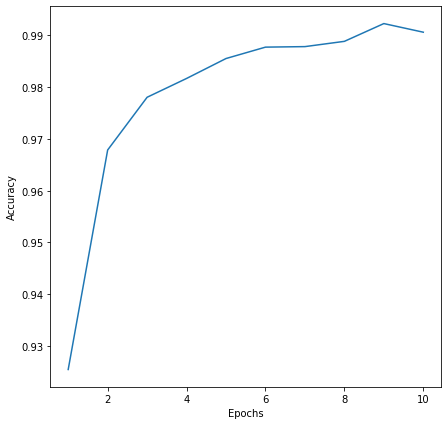

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1,validation_data=(X_test, Y_test),
          callbacks=[history])

score = model.evaluate(X_test, Y_test,
                        verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## TensorFlow and Keras Modeling: Convolutional Neural Nets

### Setting up the environment

In [9]:
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D

input_shape = (img_x, img_y, 1)
X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 1)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 1)

### Building the Model

In [10]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_cnn.add(Conv2D(64, (5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(1000, activation='relu'))
model_cnn.add(Dense(nb_classes, activation='softmax'))

### Training and Testing

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1508 - acc: 0.9546 - val_loss: 0.0422 - val_acc: 0.9868
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0403 - acc: 0.9875 - val_loss: 0.0308 - val_acc: 0.9901
Epoch 3/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0280 - acc: 0.9911 - val_loss: 0.0306 - val_acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0196 - acc: 0.9935 - val_loss: 0.0256 - val_acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0147 - acc: 0.9952 - val_loss: 0.0288 - val_acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0133 - acc: 0.9956 - val_loss: 0.0316 - val_acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0106 - acc: 0.9966 - val_loss: 0.0300 - val_acc

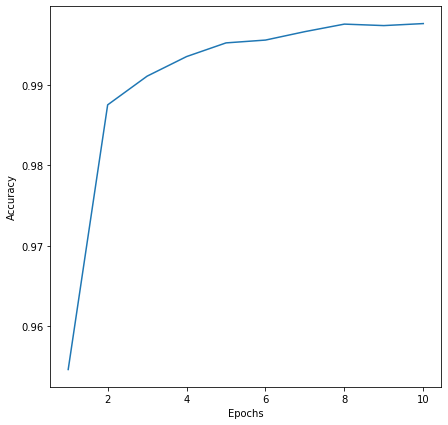

In [11]:
model_cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_cnn = AccuracyHistory()

model_cnn.fit(X_train, Y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=[history_cnn])

score = model_cnn.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history_cnn.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()